# Add project root dir to PYTHONPATH

In [2]:
import sys
import os

sys.path.append(os.path.dirname(os.path.abspath('')))


# Testing of Face Detection

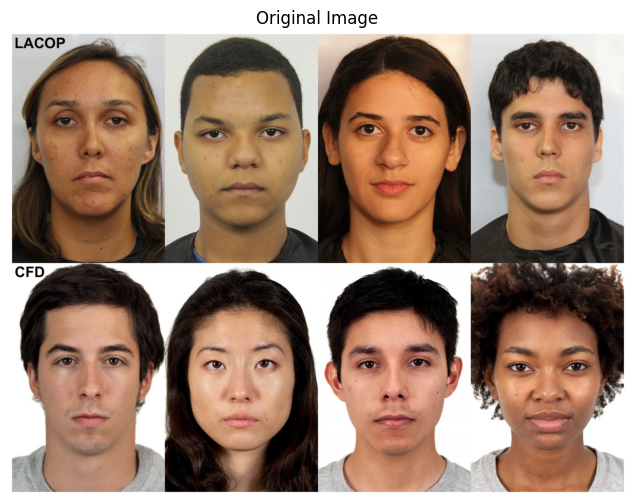

In [3]:
import cv2
import matplotlib.pyplot as plt
from src.utils import draw_faces, blur_faces
from src.haar_cascade import detect_faces, process_video_haar_cascade
from src.constants import RAW_DATA_PATH, PRE_TRAINED_HAARCASCADE_CLASSIFIER_PATH

image_file = os.path.join(RAW_DATA_PATH, "test.jpg")  # Sostituire con un'immagine reale

# Carica l'immagine
image = cv2.imread(image_file)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Visualizza l'immagine
plt.figure(figsize=(8, 6))
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis("off")
plt.show()

# Detect Faces With Pre Trained Haar Cascade Classifier

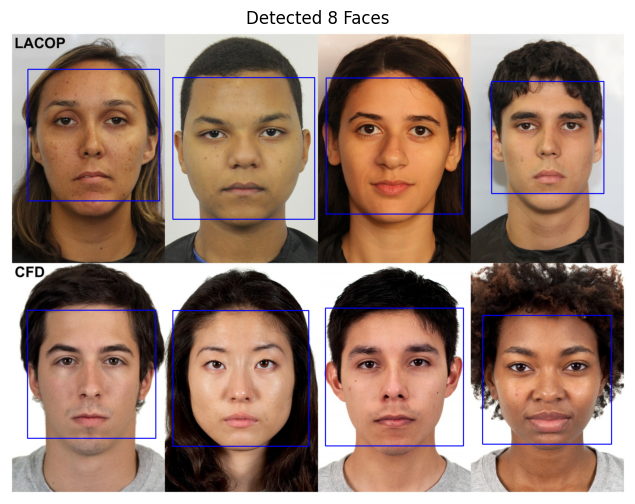

In [4]:
# Detect faces in the image
detected_faces_pre_trained = detect_faces(image, PRE_TRAINED_HAARCASCADE_CLASSIFIER_PATH)

# Draw rectangles around faces
image_with_faces = draw_faces(image_rgb, detected_faces_pre_trained)


plt.figure(figsize=(8, 6))
plt.imshow(image_with_faces)
plt.title(f"Detected {len(detected_faces_pre_trained)} Faces")
plt.axis("off")
plt.show()

# Detect Faces With Self Trained Haar Cascade Classifier

We will now repeat the same process with the Haar Cascade classifier we have trained from scratch. We used the WIDER Dataset with the `opencv_traincascade` tool from Opencv 3.4 to train the classifier.

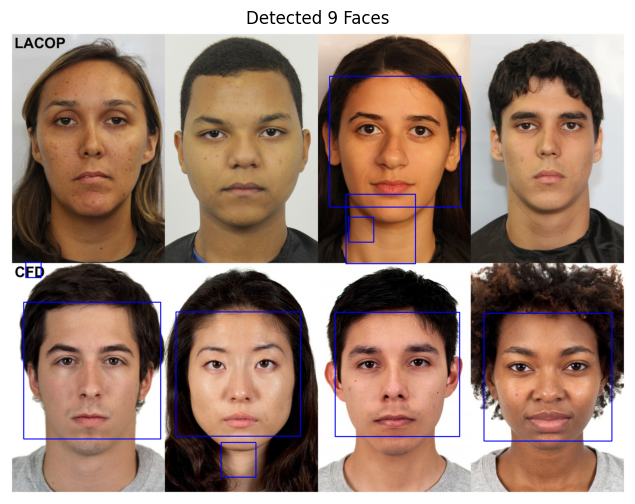

In [5]:
from src.constants import HAARCASCADE_CLASSIFIER_PATH
# Detect faces in the image using our custom Haar Cascade Classifier
detected_faces_self_trained = detect_faces(image, HAARCASCADE_CLASSIFIER_PATH)

# Draw rectangles around faces
image_with_faces = draw_faces(image_rgb, detected_faces_self_trained)


plt.figure(figsize=(8, 6))
plt.imshow(image_with_faces)
plt.title(f"Detected {len(detected_faces_self_trained)} Faces")
plt.axis("off")
plt.show()

# Blur faces with both classifiers

We will now blur the faces detected by both classifiers in the previous step. We begin with the pre-trained classifier.

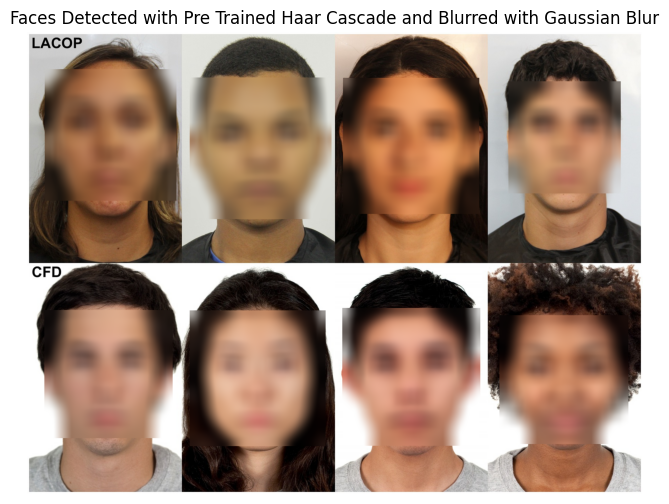

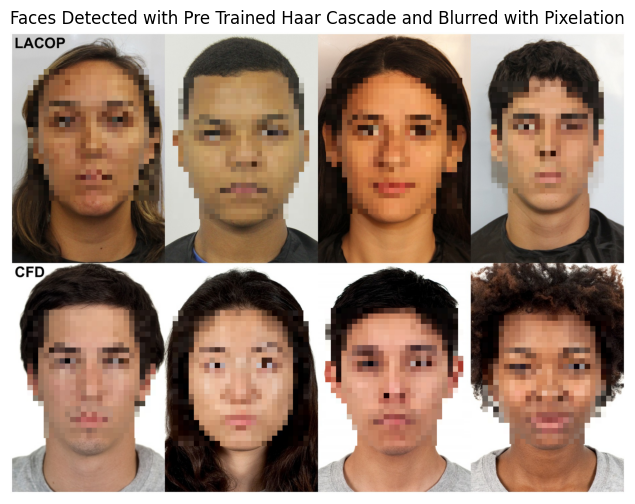

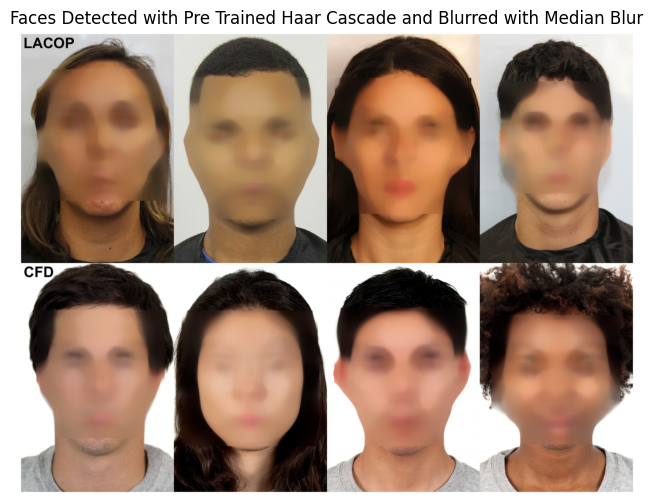

In [6]:
from src.utils import BlurMethod
# Blur faces in the image
blurred_image_with_pre_trained = blur_faces(image_rgb, detected_faces_pre_trained, BlurMethod.GAUSSIAN)

plt.figure(figsize=(8, 6))
plt.imshow(blurred_image_with_pre_trained)
plt.title("Faces Detected with Pre Trained Haar Cascade and Blurred with Gaussian Blur")
plt.axis("off")
plt.show()

# Blur faces in the image using pixelation
blurred_image_pixelation = blur_faces(image_rgb, detected_faces_pre_trained, BlurMethod.PIXELATION)

plt.figure(figsize=(8, 6))
plt.imshow(blurred_image_pixelation)
plt.title("Faces Detected with Pre Trained Haar Cascade and Blurred with Pixelation")
plt.axis("off")
plt.show()

# Blur faces in the image using median blur
blurred_image_median = blur_faces(image_rgb, detected_faces_pre_trained, BlurMethod.MEDIAN)

plt.figure(figsize=(8, 6))
plt.imshow(blurred_image_median)
plt.title("Faces Detected with Pre Trained Haar Cascade and Blurred with Median Blur")
plt.axis("off")
plt.show()


...and now we will blur the faces detected by the self-trained classifier.

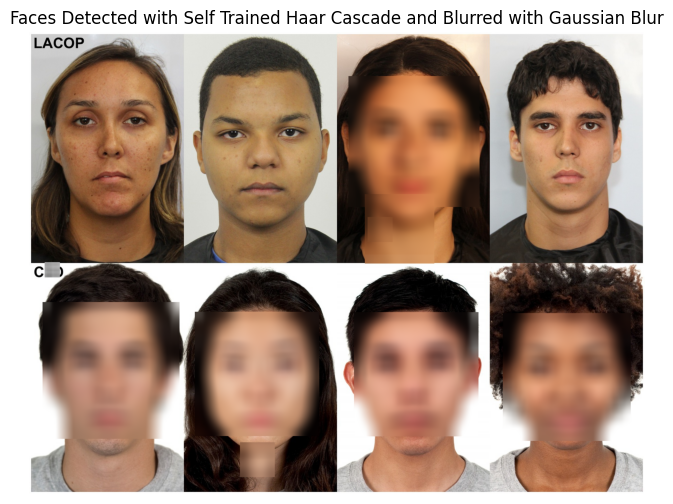

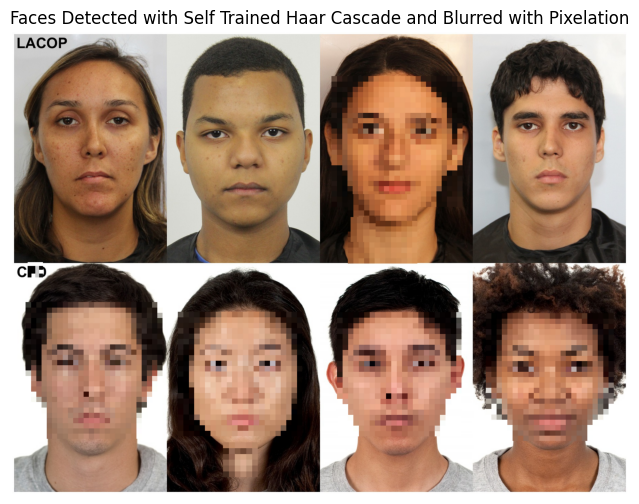

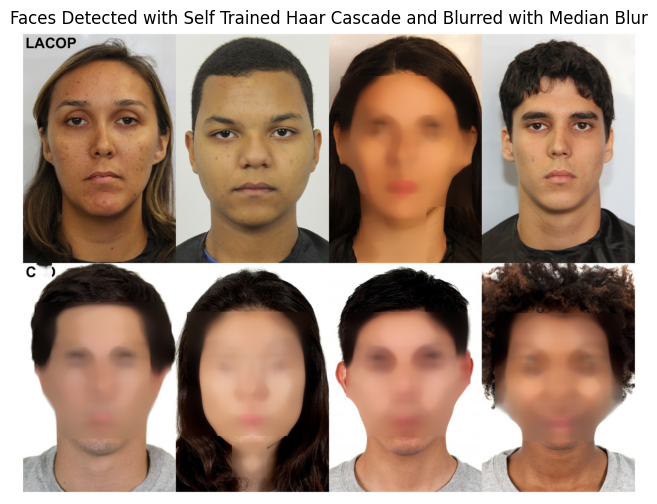

In [7]:
# Blur faces in the image using our custom Haar Cascade Classifier
blurred_image_self_trained = blur_faces(image_rgb, detected_faces_self_trained, BlurMethod.GAUSSIAN)

plt.figure(figsize=(8, 6))
plt.imshow(blurred_image_self_trained)
plt.title("Faces Detected with Self Trained Haar Cascade and Blurred with Gaussian Blur")
plt.axis("off")
plt.show()

# Blur faces in the image using pixelation
blurred_image_pixelation = blur_faces(image_rgb, detected_faces_self_trained, BlurMethod.PIXELATION)

plt.figure(figsize=(8, 6))
plt.imshow(blurred_image_pixelation)
plt.title("Faces Detected with Self Trained Haar Cascade and Blurred with Pixelation")
plt.axis("off")
plt.show()

# Blur faces in the image using median blur
blurred_image_median = blur_faces(image_rgb, detected_faces_self_trained, BlurMethod.MEDIAN)

plt.figure(figsize=(8, 6))
plt.imshow(blurred_image_median)
plt.title("Faces Detected with Self Trained Haar Cascade and Blurred with Median Blur")
plt.axis("off")
plt.show()

# Testing on Video

Since `Pre Trained` was able to detect faces more accurately, we will use this algorithm for video blurring instead of the `Self Trained` model.  
However, it is still possible to test the `Self Trained` model, although it is significantly slower. To do so, modify the constant `PRE_TRAINED_HAARCASCADE_CLASSIFIER_PATH` to `HAARCASCADE_CLASSIFIER_PATH` in the following function:

```python
process_video_haar_cascade(input_video_path, output_video_gaussian, PRE_TRAINED_HAARCASCADE_CLASSIFIER_PATH, BlurMethod.GAUSSIAN)
```


In [ ]:
from src.constants import RAW_DATA_PATH, PROCESSED_DATA_PATH, PRE_TRAINED_HAARCASCADE_CLASSIFIER_PATH
# Path to the input video
input_video_path = os.path.join(RAW_DATA_PATH, "test.mp4")
output_video_gaussian = os.path.join(PROCESSED_DATA_PATH, "test_pre_trained_viola_gaussian.avi")
output_video_pixelation = os.path.join(PROCESSED_DATA_PATH, "test_pre_trained_viola_pixelation.avi")
output_video_median = os.path.join(PROCESSED_DATA_PATH, "test_pre_trained_viola_median.avi")

# Process the video
process_video_haar_cascade(input_video_path, output_video_gaussian, PRE_TRAINED_HAARCASCADE_CLASSIFIER_PATH, BlurMethod.GAUSSIAN)
process_video_haar_cascade(input_video_path, output_video_pixelation, PRE_TRAINED_HAARCASCADE_CLASSIFIER_PATH, BlurMethod.PIXELATION)
process_video_haar_cascade(input_video_path, output_video_median, PRE_TRAINED_HAARCASCADE_CLASSIFIER_PATH, BlurMethod.MEDIAN)

# Using YOLOv3

First, we download the weights and configuration files for YOLOv3. If they are already downloaded, the helper function will not download them again.

In [9]:
from src.yolo import download_yolo_models

# Download YOLO models
download_yolo_models()


YOLO model files not found. Downloading them...


Downloading...
From (original): https://drive.google.com/uc?id=13gFDLFhhBqwMw6gf8jVUvNDH2UrgCCrX
From (redirected): https://drive.google.com/uc?id=13gFDLFhhBqwMw6gf8jVUvNDH2UrgCCrX&confirm=t&uuid=64161c37-ebcd-448c-b122-5d17088adffc
To: /home/sarto/Documents/face-blurrer/notebook/yolov3-wider_16000.weights.zip
100%|██████████| 230M/230M [00:10<00:00, 21.7MB/s] 


Downloaded yolov3-wider_16000.weights.zip
Extracting yolov3-wider_16000.weights.zip into /home/sarto/Documents/face-blurrer/YOLO-classifier...
Extraction complete.
yolov3-wider_16000.weights.zip removed.


Downloading...
From (original): https://drive.google.com/uc?id=1a_pbXPYNj7_Gi6OxUqNo_T23Dt_9CzOV
From (redirected): https://drive.google.com/uc?id=1a_pbXPYNj7_Gi6OxUqNo_T23Dt_9CzOV&confirm=t&uuid=db5d0a92-dec0-4055-a6f6-d08f57047306
To: /home/sarto/Documents/face-blurrer/notebook/YOLO_Face.h5.zip
100%|██████████| 231M/231M [00:10<00:00, 22.1MB/s] 


Downloaded YOLO_Face.h5.zip
Extracting YOLO_Face.h5.zip into /home/sarto/Documents/face-blurrer/YOLO-classifier...
Extraction complete.
YOLO_Face.h5.zip removed.
All files downloaded and extracted successfully!


## Load the image

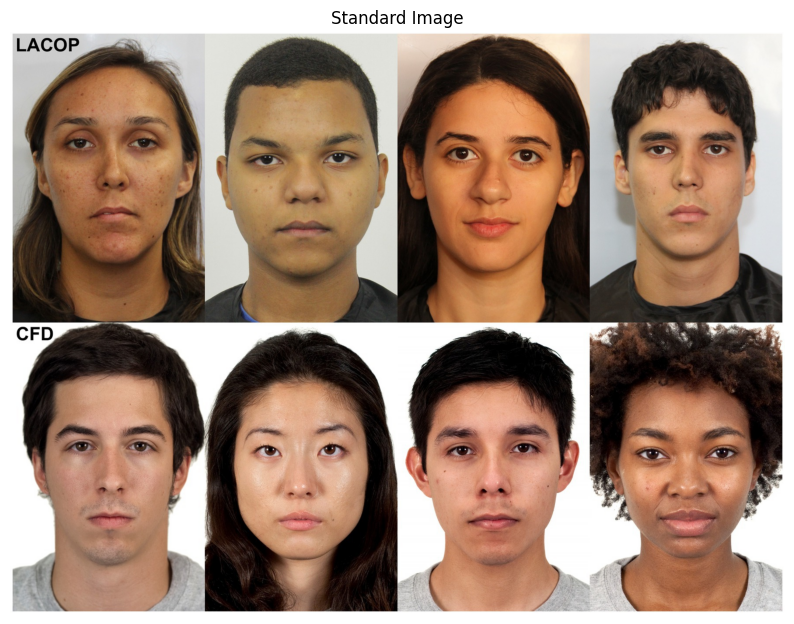

In [10]:
from src.constants import RAW_DATA_PATH
# Load the image
image_file = os.path.join(RAW_DATA_PATH, "test.jpg")
yolo_image = cv2.imread(image_file)

# Show the image with detected faces
plt.figure(figsize=(10, 8))
plt.imshow(cv2.cvtColor(yolo_image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title("Standard Image")
plt.show()

## Use YOLOv3 for face detection

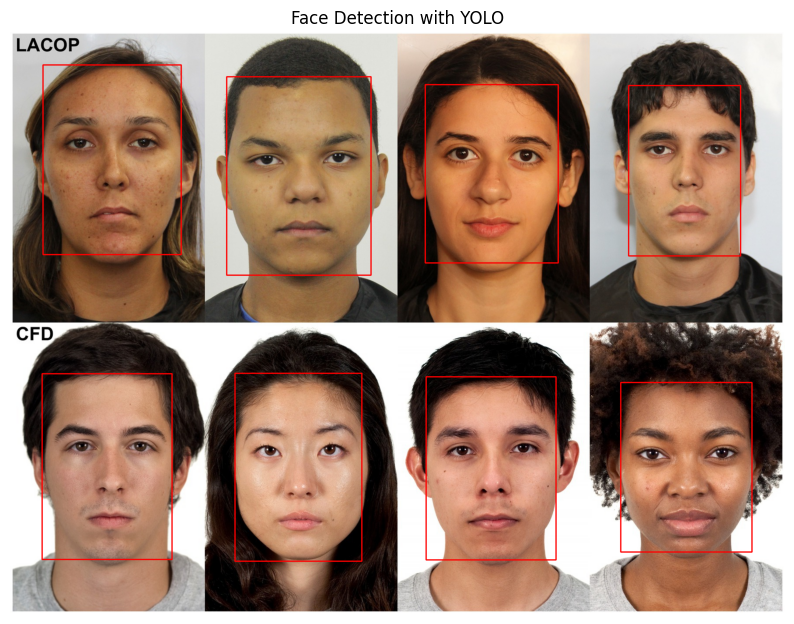

In [11]:
from src.yolo import load_yolo_model, detect_faces_yolo


yolo_net, yolo_classes = load_yolo_model()
output_layers = yolo_net.getUnconnectedOutLayersNames()

# Detect faces in the image using YOLO
detected_faces = detect_faces_yolo(yolo_image, yolo_net, output_layers)

image_faces = yolo_image.copy()

# Draw rectangles around the detected faces
for (x, y, w, h) in detected_faces:
    cv2.rectangle(image_faces, (x, y), (x+w, y+h), (0, 0, 255), 2)

# Show the image with detected faces
plt.figure(figsize=(10, 8))
plt.imshow(cv2.cvtColor(image_faces, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title("Face Detection with YOLO")
plt.show()

## Apply blurring effects

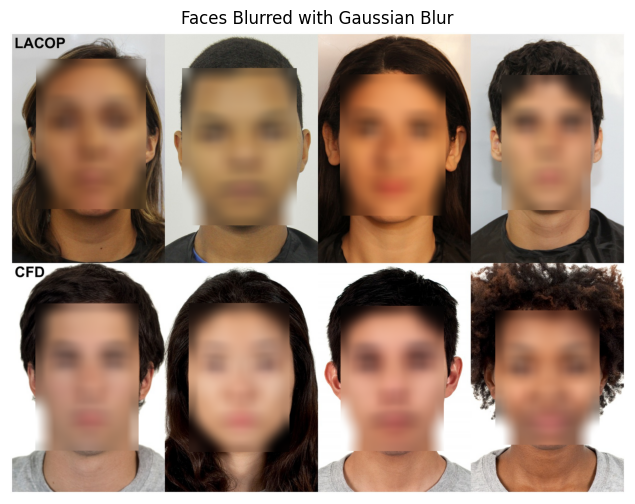

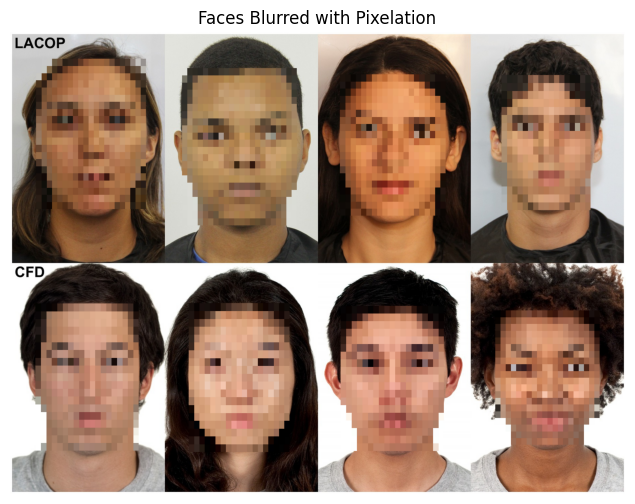

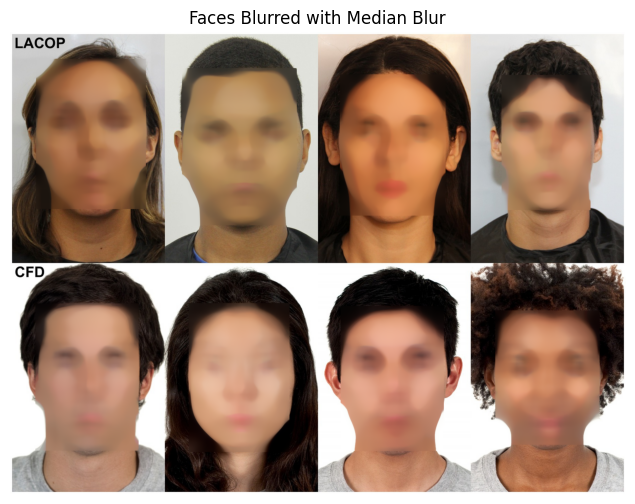

In [12]:
# Blur faces in the image
blurred_image = blur_faces(yolo_image, detected_faces)

plt.figure(figsize=(8, 6))
plt.imshow(cv2.cvtColor(blurred_image, cv2.COLOR_BGR2RGB))
plt.title("Faces Blurred with Gaussian Blur")
plt.axis("off")
plt.show()

# Blur faces in the image using pixelation
blurred_image_pixelation = blur_faces(yolo_image, detected_faces, BlurMethod.PIXELATION)

plt.figure(figsize=(8, 6))
plt.imshow(cv2.cvtColor(blurred_image_pixelation, cv2.COLOR_BGR2RGB))
plt.title("Faces Blurred with Pixelation")
plt.axis("off")
plt.show()

# Blur faces in the image using median blur
blurred_image_median = blur_faces(yolo_image, detected_faces, BlurMethod.MEDIAN)

plt.figure(figsize=(8, 6))
plt.imshow(cv2.cvtColor(blurred_image_median, cv2.COLOR_BGR2RGB))
plt.title("Faces Blurred with Median Blur")
plt.axis("off")
plt.show()

## Testing on Video

In [13]:
from src.yolo import process_video_yolo, BlurMethod
from src.constants import PROCESSED_DATA_PATH
# Path to the input video
input_video_path = os.path.join(RAW_DATA_PATH, "test.mp4")
output_video_gaussian = os.path.join(PROCESSED_DATA_PATH, "yolo_gaussian_video.avi")
output_video_pixelation = os.path.join(PROCESSED_DATA_PATH, "yolo_pixelated_video.avi")
output_video_median = os.path.join(PROCESSED_DATA_PATH, "yolo_median_video.avi")

# Process the video
process_video_yolo(input_video_path, output_video_gaussian, BlurMethod.GAUSSIAN)
process_video_yolo(input_video_path, output_video_pixelation, BlurMethod.PIXELATION)
process_video_yolo(input_video_path, output_video_median, BlurMethod.MEDIAN)

Processed video saved at: /home/sarto/Documents/face-blurrer/data/processed/yolo_gaussian_video.avi
Processed video saved at: /home/sarto/Documents/face-blurrer/data/processed/yolo_pixelated_video.avi
Processed video saved at: /home/sarto/Documents/face-blurrer/data/processed/yolo_median_video.avi
